<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-Load-Data" data-toc-modified-id="Import-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and Load Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Trying-Out-Models" data-toc-modified-id="Trying-Out-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trying Out Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)" data-toc-modified-id="Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Trees (Random Forest, Gradient Boosting, XGBoost)</a></span></li><li><span><a href="#Other-Models-(e.g.-Bagging-Classifier)" data-toc-modified-id="Other-Models-(e.g.-Bagging-Classifier)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Other Models (e.g. Bagging Classifier)</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></div>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')

## Import and Load Data

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential

In [3]:
#!pip install xgboost

In [4]:
#load in your data

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.read_csv("product_info.csv", index_col=None)

In [8]:
df.shape

(8494, 27)

In [9]:
df.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [11]:
df.shape

(8494, 27)

array([[<Axes: title={'center': 'brand_id'}>,
        <Axes: title={'center': 'loves_count'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'reviews'}>],
       [<Axes: title={'center': 'price_usd'}>,
        <Axes: title={'center': 'value_price_usd'}>,
        <Axes: title={'center': 'sale_price_usd'}>,
        <Axes: title={'center': 'limited_edition'}>],
       [<Axes: title={'center': 'new'}>,
        <Axes: title={'center': 'online_only'}>,
        <Axes: title={'center': 'out_of_stock'}>,
        <Axes: title={'center': 'sephora_exclusive'}>],
       [<Axes: title={'center': 'child_count'}>,
        <Axes: title={'center': 'child_max_price'}>,
        <Axes: title={'center': 'child_min_price'}>, <Axes: >]],
      dtype=object)

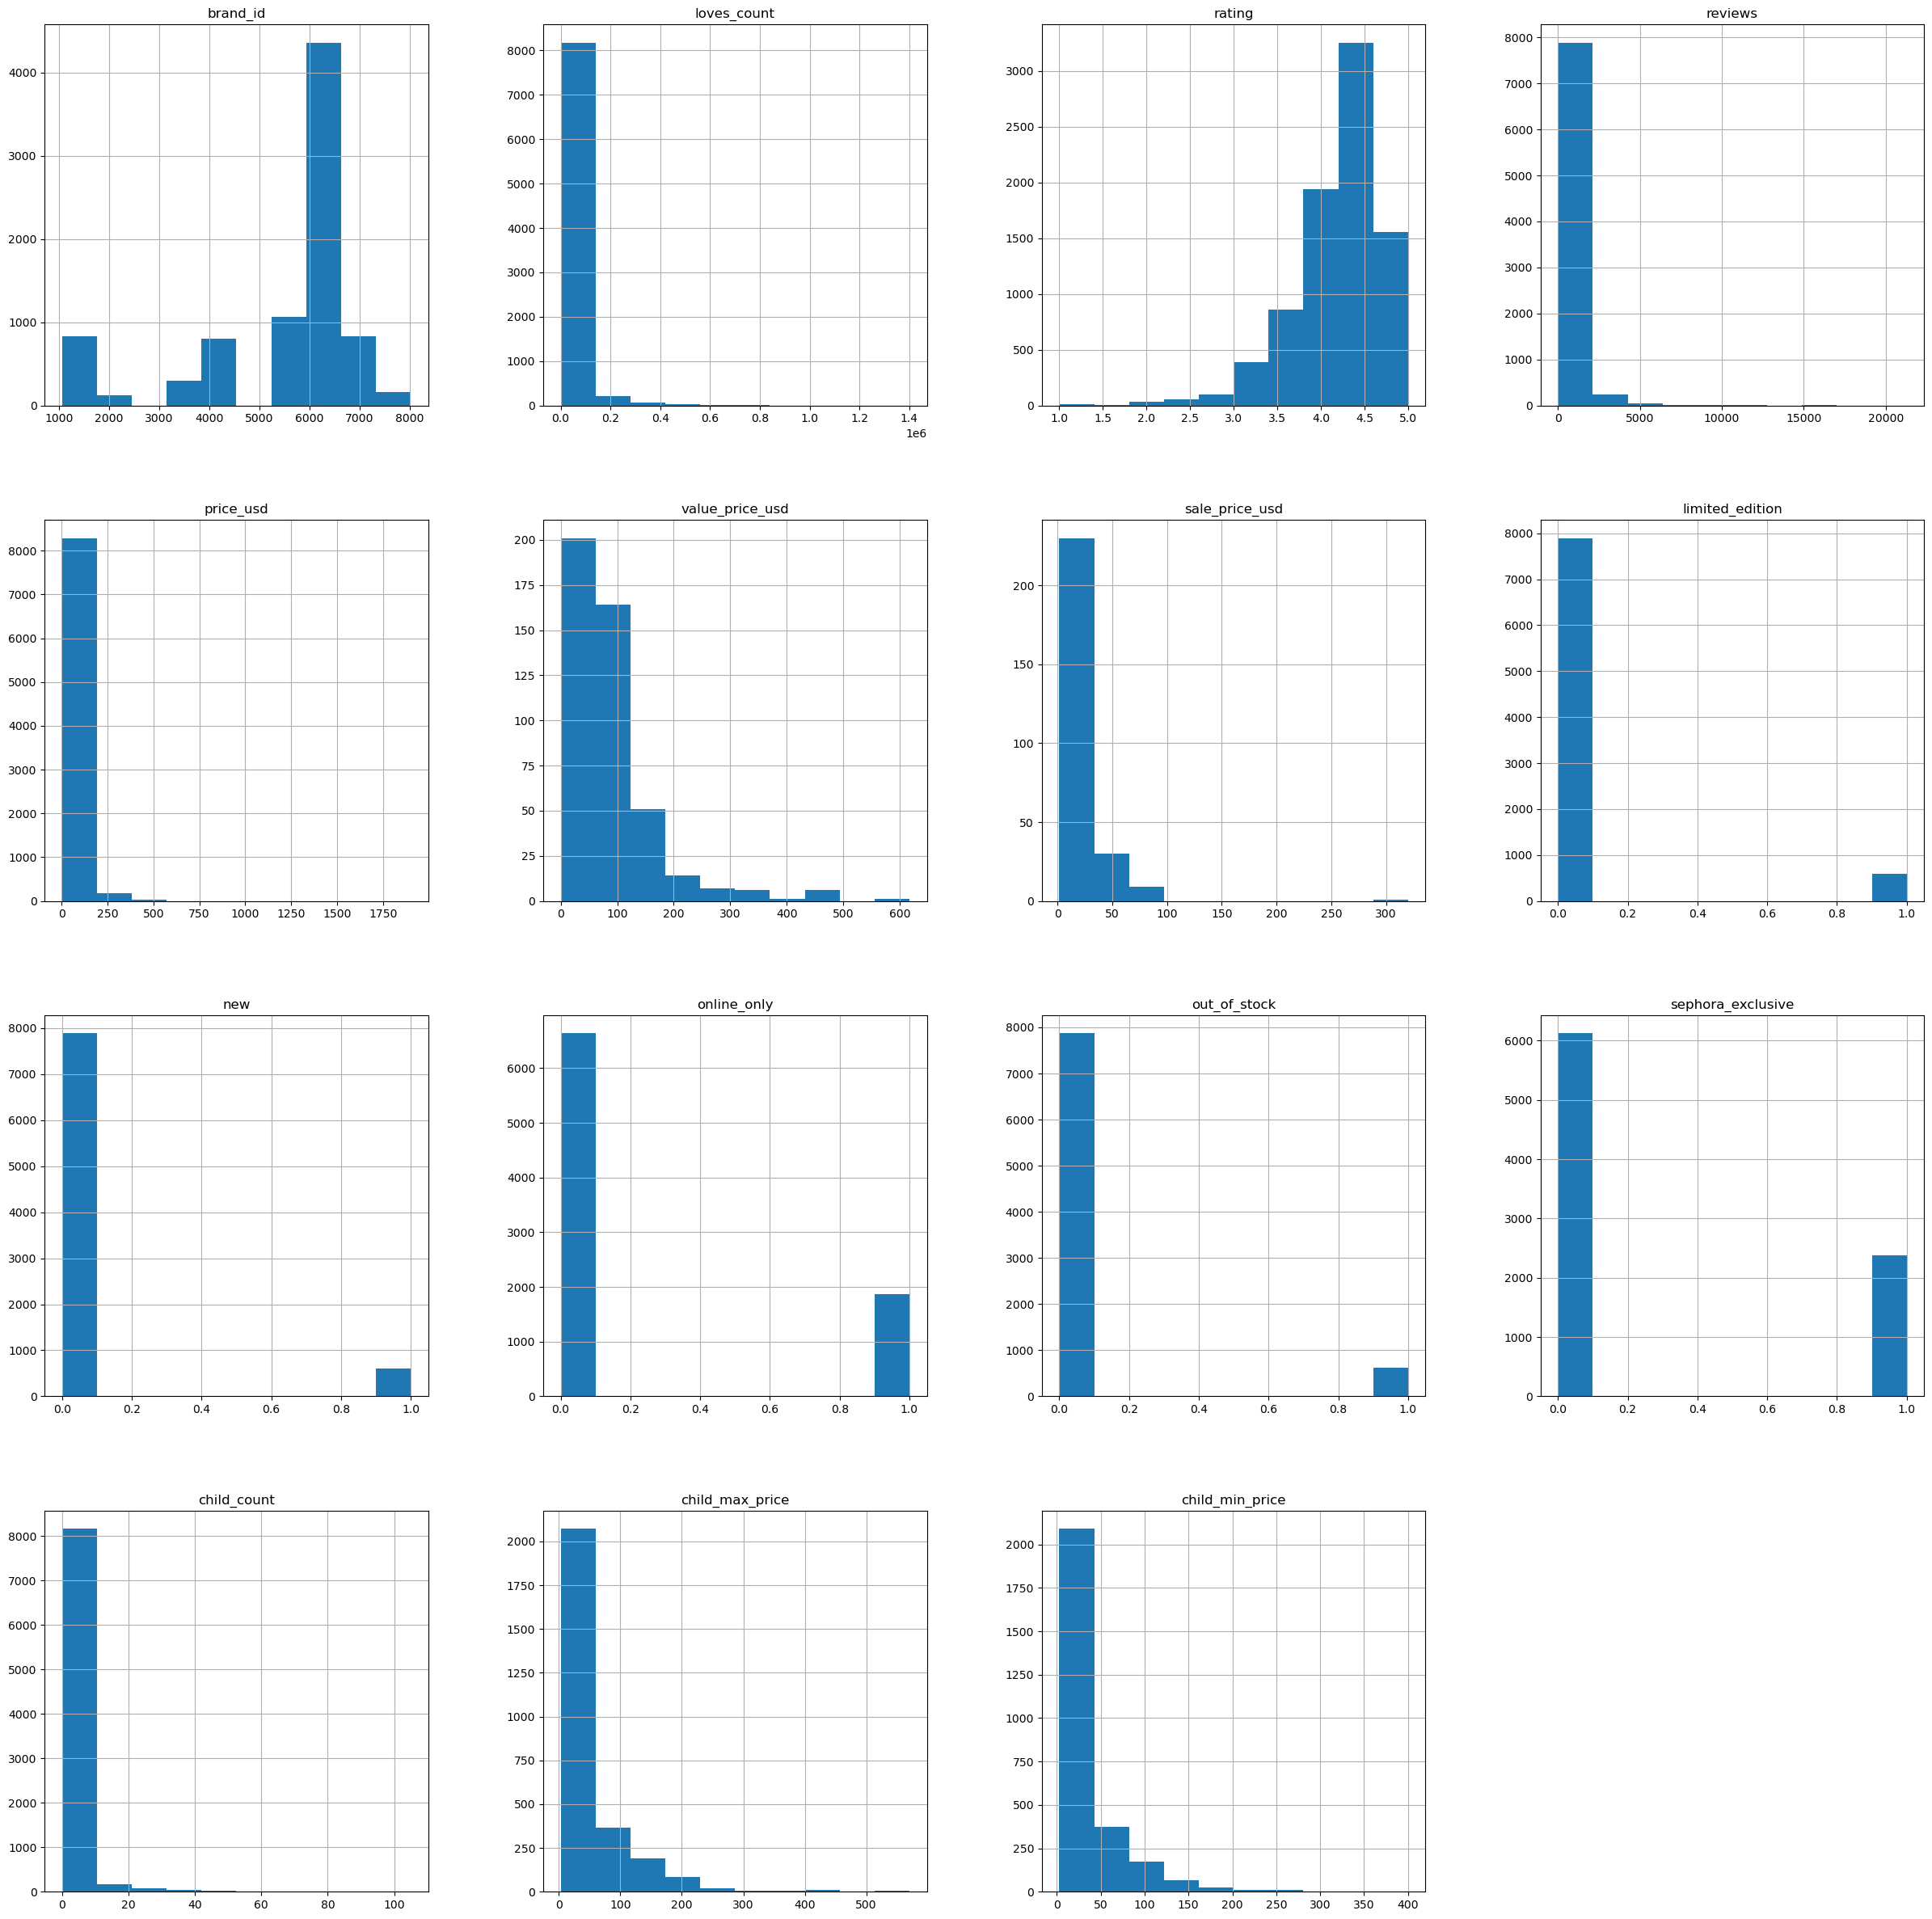

In [12]:
df.hist(figsize=[30,30])

In [13]:
df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


## Preprocessing

 - Handle missing values
 - Split the dataset into train and test for autogluon.

In [14]:
len(df.columns)

27

In [15]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [16]:
df.isna().sum()[df.isna().sum()!=0]

rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
value_price_usd       8043
sale_price_usd        8224
highlights            2207
secondary_category       8
tertiary_category      990
child_max_price       5740
child_min_price       5740
dtype: int64

Dropping columns with more than 50% of NaNs

In [17]:
threshold = len(df)* 0.5

In [18]:
df.dropna(thresh = threshold, axis = 1, inplace = True)

In [19]:
len(df.columns)

22

In [20]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'ingredients', 'price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count'],
      dtype='object')

In [21]:
df.isna().sum()[df.isna().sum()!=0]

rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
ingredients            945
highlights            2207
secondary_category       8
tertiary_category      990
dtype: int64

In [22]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [23]:
df.rating.value_counts().head()

rating
5.0000    256
4.0000    174
4.5000     82
4.3333     68
3.0000     66
Name: count, dtype: int64

In [24]:
df.rating.nunique()

4394

In [25]:
df['rating'].fillna(df['rating'].median(), inplace=True)

In [26]:
# Round ratings to the nearest 0.5 step
df['rating'] = df['rating'].apply(lambda x: round(x * 2) / 2)

In [27]:
df.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.5,11.0,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.0,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [28]:
df.rating.value_counts()

rating
4.5    3971
4.0    2499
3.5     877
5.0     724
3.0     284
2.5      80
2.0      40
1.0      14
1.5       5
Name: count, dtype: int64

In [29]:
df.reviews.value_counts().head()

reviews
2.0    144
4.0    134
3.0    124
1.0    124
6.0    124
Name: count, dtype: int64

Filling reviews number column with 0 as it is inline with the dataset.

In [30]:
# Filling NaN values with 0
df['reviews'].fillna(0, inplace=True)

In [31]:
df['size'].value_counts().head()

size
1.7 oz/ 50 mL     500
1 oz/ 30 mL       366
3.4 oz/ 100 mL    211
0.5 oz/ 15 mL     171
1.7 oz / 50 mL    124
Name: count, dtype: int64

In [32]:
df['variation_value'].value_counts().head()

variation_value
1.7 oz/ 50 mL     374
1 oz/ 30 mL       302
0.5 oz/ 15 mL     147
3.4 oz/ 100 mL    128
1.7 oz / 50 mL     96
Name: count, dtype: int64

In [33]:
df['size'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL', ..., '0.25 oz/ 7.5 ml',
       '2.6 oz', '.11 oz / 3.2 mL'], dtype=object)

In [34]:
df[df['size'].isna()]['secondary_category'].unique()

array(['Value & Gift Sets', 'Eye Care', 'Hair Styling & Treatments',
       'Face', 'Tools', 'Eye', 'Brushes & Applicators', 'Lip',
       'Makeup Palettes', 'Beauty Tools', 'Mini Size', 'Accessories',
       'Makeup', 'Cheek', 'Wellness', 'High Tech Tools', 'Sunscreen',
       'Candles & Home Scents', 'Shampoo & Conditioner',
       'Body Moisturizers', 'Women', 'Masks', 'Treatments', 'Skincare',
       'Hair Tools', 'Body Care', 'Nail', 'Cleansers',
       'Lip Balms & Treatments', 'Moisturizers', 'Beauty Accessories',
       'Shop by Concern', 'Shaving', 'Self Tanners', 'Bath & Shower',
       'Fragrance', nan], dtype=object)

In [35]:
df[df['size'].isna()]['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Hair', 'Skincare', 'Makeup',
       'Tools & Brushes', 'Mini Size', 'Men', 'Gifts'], dtype=object)

In [36]:
def extract_ounces(size_str):
    if pd.isna(size_str):
        return np.nan
    # Find all occurrences of numbers followed by 'oz'
    matches = re.findall(r'(\d*\.?\d+)\s*oz', size_str, re.IGNORECASE)
    # Get the first match as a float
    return round(float(matches[0]), 2) if matches else np.nan

# Apply the function to the 'size' column to extract ounce values
df['size'] = df['size'].apply(extract_ounces)

In [37]:
median_oz = round(df['size'].median(), 2)

# Fill NaN values with the rounded median 'oz' value
df['size'].fillna(median_oz, inplace=True)

In [38]:
df.head(1)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.5,11.0,1.7,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0


In [39]:
df.isna().sum()[df.isna().sum()!=0]

variation_type        1444
variation_value       1598
ingredients            945
highlights            2207
secondary_category       8
tertiary_category      990
dtype: int64

In [40]:
df.variation_type.value_counts()

variation_type
Size                                  4043
Color                                 1700
Size + Concentration + Formulation    1173
Type                                    88
Scent                                   30
Size + Concentration                    11
Formulation                              5
Name: count, dtype: int64

In [40]:
threshold = 100

# Group variation types with counts below the threshold into 'Other'
value_counts = df['variation_type'].value_counts()
to_replace = value_counts[value_counts < threshold].index
df['variation_type'] = df['variation_type'].replace(to_replace, 'Other')

In [41]:
df.variation_type.value_counts()

variation_type
Size                                  4043
Color                                 1700
Size + Concentration + Formulation    1173
Other                                  134
Name: count, dtype: int64

In [42]:
df['variation_type'].fillna('Unknown', inplace=True)

In [43]:
df.variation_type.value_counts()

variation_type
Size                                  4043
Color                                 1700
Unknown                               1444
Size + Concentration + Formulation    1173
Other                                  134
Name: count, dtype: int64

Dropping variation_value as it is highly correlated to the size column.

In [44]:
df.drop(columns=['variation_value'], inplace = True)

In [45]:
df.isna().sum()[df.isna().sum()!=0]

ingredients            945
highlights            2207
secondary_category       8
tertiary_category      990
dtype: int64

In [46]:
df['ingredients'].fillna('Unknown', inplace=True)

In [47]:
# Replace NaN values in 'highlights' with a list containing 'No Highlights'
df['highlights'].fillna('Unknown', inplace=True)

In [48]:
df.isna().sum()[df.isna().sum()!=0]

secondary_category      8
tertiary_category     990
dtype: int64

In [49]:
df = df.dropna(subset=['secondary_category'])

In [50]:
def fill_categories_from_product_name(product_names, categories):
    # Define a list of keywords to look for in product names
    keywords = ['cleanser', 'moisturizer', 'perfume', 'shampoo', 'spray', 'nail polish', 'balm',
               'mascara','brow pencil','primer','oil','conditioner','set','hair','gel','suncsreen','exfoliator',
                'kit','mask','primer','face wash','treatment','blush','cream','Highlighter','powder','serum',
               'contour','nail','toner','candle','concealer','exfoliant','sunscreen','tint']
    # Join keywords into a regex pattern
    pattern = '|'.join(keywords)

    # Function to search for keywords in the product name
    def find_keyword(product_name):
        match = re.search(pattern, product_name, re.IGNORECASE)
        return match.group(0) if match else "Unknown"

    # Apply the find_keyword function to fill NaN values
    filled_categories = categories.copy()  # Avoid modifying the original Series
    # For rows with NaN in categories, extract and use the keyword from product names
    condition = filled_categories.isna()
    filled_categories[condition] = product_names[condition].apply(find_keyword)

    return filled_categories

# Apply the function
df['tertiary_category'] = fill_categories_from_product_name(df['product_name'], df['tertiary_category'])

In [51]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.5,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.0,13.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.0,16.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.5,21.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.0,13.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [52]:
df.isna().any().any()

False

In [53]:
df.product_name.nunique()

8407

In [54]:
df.shape

(8486, 21)

In [55]:
df.highlights.nunique()

4418

In [56]:
df.highlights.isna().sum()

0

In [57]:
df.head(1)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.5,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0


In [58]:
df['product_id'] = df['product_id'].str.replace('P', '').astype(int)

In [59]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,473671,Fragrance Discovery Set,6342,19-69,6320,3.5,11.0,1.7,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,473668,La Habana Eau de Parfum,6342,19-69,3827,4.0,13.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.0,16.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,473660,Kasbah Eau de Parfum,6342,19-69,3018,4.5,21.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.0,13.0,3.4,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [60]:
df.isna().any()

product_id            False
product_name          False
brand_id              False
brand_name            False
loves_count           False
rating                False
reviews               False
size                  False
variation_type        False
ingredients           False
price_usd             False
limited_edition       False
new                   False
online_only           False
out_of_stock          False
sephora_exclusive     False
highlights            False
primary_category      False
secondary_category    False
tertiary_category     False
child_count           False
dtype: bool

In [61]:
#pip install autogluon

In [62]:
from autogluon.tabular import TabularPredictor
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (adjust test_size and random_state as needed)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Get hyperparameter configuration for regression
hyperparameters = get_hyperparameter_config('multimodal')

# Fit AutoGluon model with specified hyperparameters using only the training data
predictor = TabularPredictor(label='price_usd').fit(
    X_train,
    hyperparameters=hyperparameters,
    time_limit=3600,  # Set a time limit for training (in seconds)
    presets='best_quality'  # Use the 'best_quality' preset for better quality models
)

# Make predictions on the test data
predictions = predictor.predict(X_test)

# Get performance summary
performance = predictor.evaluate_predictions(y_true=X_test['price_usd'], y_pred=predictions)
print(performance)


No path specified. Models will be saved in: "AutogluonModels/ag-20240312_060128"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240312_060128/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20240312_060128/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

{'root_mean_squared_error': -21.505364831630388, 'mean_squared_error': -462.4807165415251, 'mean_absolute_error': -11.00843914234175, 'r2': 0.8205110137956542, 'pearsonr': 0.9080769614198096, 'median_absolute_error': -5.399360656738281}


In [63]:
best_model = predictor.get_model_best()

<ipython-input-63-a771593e68cf>:1: DeprecationWarning: `get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!
  best_model = predictor.get_model_best()


In [64]:
best_model

'WeightedEnsemble_L3'

In [65]:
predictor.leaderboard(X_test)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-21.505365,-30.220753,root_mean_squared_error,10.867427,13.458501,2012.283405,0.005849,0.000494,0.341322,3,True,13
1,WeightedEnsemble_L2,-21.627332,-30.337944,root_mean_squared_error,6.470722,7.991956,1717.697834,0.003177,0.000412,0.178516,2,True,6
2,LightGBMLarge_BAG_L2,-21.668105,-31.206952,root_mean_squared_error,7.396911,8.792072,1772.925297,0.929366,0.800527,55.405980,2,True,12
3,CatBoost_BAG_L2,-21.689347,-30.632954,root_mean_squared_error,7.407640,10.420932,1795.521407,0.940094,2.429387,78.002090,2,True,9
4,LightGBM_BAG_L2,-21.717844,-30.908478,root_mean_squared_error,7.145009,8.687673,1740.403781,0.677463,0.696128,22.884464,2,True,7
5,XGBoost_BAG_L2,-21.890939,-31.934298,root_mean_squared_error,7.853789,9.020694,1826.653686,1.386244,1.029149,109.134369,2,True,10
6,LightGBM_BAG_L1,-22.027723,-30.894591,root_mean_squared_error,1.300499,1.498740,54.444235,1.300499,1.498740,54.444235,1,True,1
7,LightGBMXT_BAG_L2,-22.049616,-31.370815,root_mean_squared_error,7.135609,8.668271,1737.074673,0.668064,0.676726,19.555356,2,True,8
8,NeuralNetTorch_BAG_L2,-22.728902,-31.871524,root_mean_squared_error,6.928412,8.502816,1746.515179,0.460866,0.511271,28.995862,2,True,11
9,CatBoost_BAG_L1,-22.802934,-32.042882,root_mean_squared_error,1.199879,2.529992,1256.672662,1.199879,2.529992,1256.672662,1,True,3


As per the AutoGluon, the best rmse is 21.